In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set_theme(style="whitegrid")
sns.set_palette("bright")

In [55]:
df = pd.read_csv('loan_data.csv')

# DATA INFO
This dataset is a synthetic version inspired by the original Credit Risk dataset on Kaggle and enriched with additional variables based on Financial Risk for Loan Approval data. SMOTENC was used to simulate new data points to enlarge the instances. The dataset is structured for both categorical and continuous features.



In [56]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


# DATAFRAME INFO

### The dataset contains 45,000 records and 14 variables, each described below:

### Columns->

**person_age** = Age of a person (Float)

**person_gender** = Gender of a person (Categorical)

**person_education** = Highest Education of person (Categorical)

**person_income** = Annual Income (Int)

**person_emp_exp** = Years of employment experience (INT)

**person_home_ownership** = Home ownership status (e.g., rent, own, mortgage) (Categorical)

**loan_amt** = Loan amount requested (Float)

**loan_intent** = Purpose of the loan (Categorical)

**loan_int_rate** = Loan interest rate (Float)

**loan_percent_income** = Loan amount as a percentage of annual income (Float)

**cb_person_cred_hist_length** = Length of credit history in years (Float)

**credit_score** = Credit score of the person (INT)

**previous_loan_defaults_on_file** = Indicator of previous loan defaults (Categorical)

**loan_status** = Loan approval status: 1 = approved; 0 = rejected **TARGET VARIABLE** (INT)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [58]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In age columns the max value is 144 that is not right i.e it is an outlier

In [59]:
def get_dtypes(df: pd.DataFrame) -> [list,list]:
    l1 = []
    l2 = []
    for col in df.columns:
        if df[col].dtype == 'O':
            l1.append(col)
        else:
            l2.append(col)
    return l1,l2

In [60]:
categorical_columns = get_dtypes(df)[0]
numerical_columns = get_dtypes(df)[1]

In [61]:
print(categorical_columns)
print(numerical_columns)

['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


### UNIVARIATE ANALYSIS

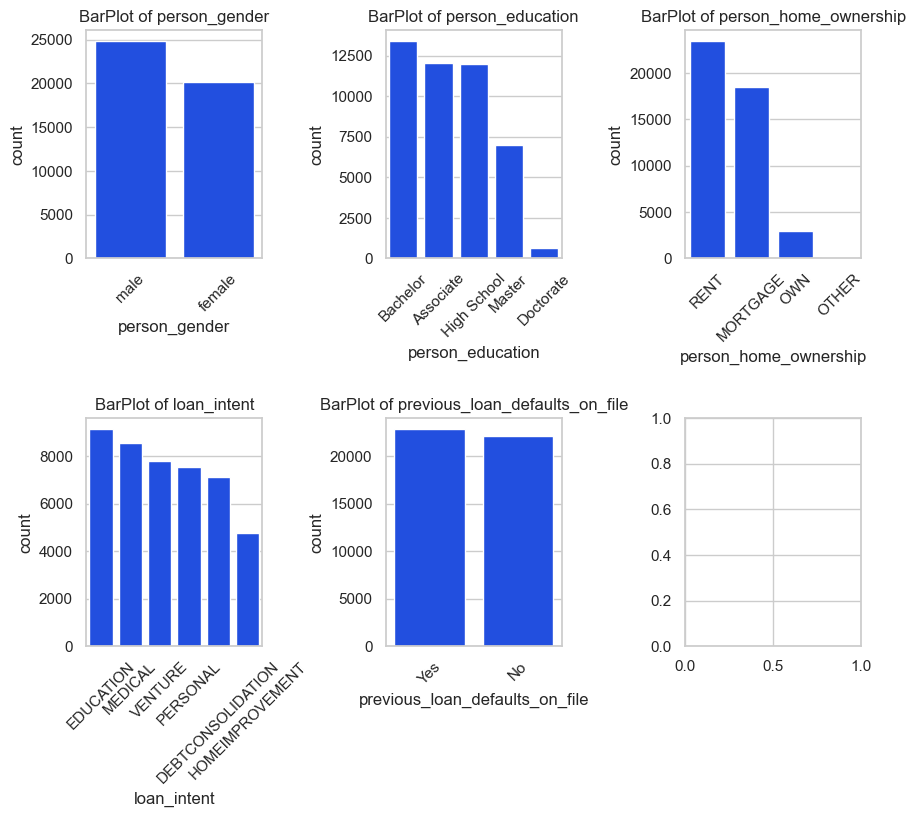

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8)) 

for ax, col in zip(axes.flat, categorical_columns):
    sns.barplot(df[col].value_counts(),ax=ax)
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f"BarPlot of {col}")
fig.subplots_adjust(wspace=0.7, hspace=0.7)

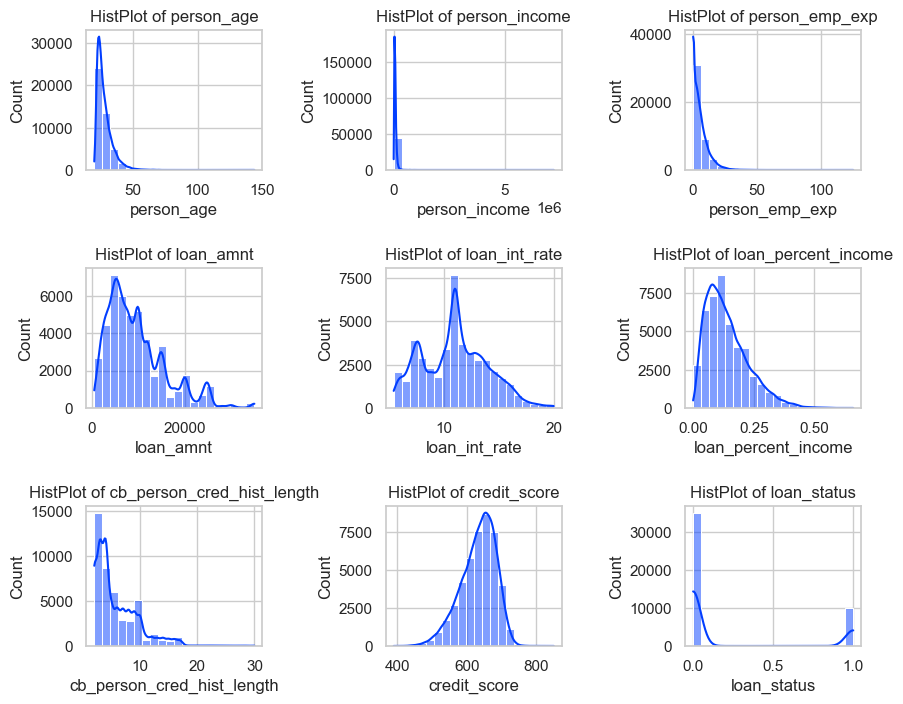

In [63]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8)) 

for ax, col in zip(axes.flat, numerical_columns):
    sns.histplot(df[col],ax=ax,bins=20,kde=True)
    ax.set_title(f"HistPlot of {col}")
fig.subplots_adjust(wspace=0.7, hspace=0.7)

In [64]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


## Check Multicollinearity for Categorical features
**A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

**A chi-square statistic is one way to show a relationship between two categorical variables.**

**Here we test correlation of Categorical columns with Target column i.e case_status**

Null Hypothesis : The Feature is independent of target column (No-Correlation)

Alternative Hypothesis : The Feature and Target column are not independent (Correalted)


In [83]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_columns:
    if chi2_contingency(pd.crosstab(df['loan_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_columns, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,person_gender,Fail to Reject Null Hypothesis
1,person_education,Fail to Reject Null Hypothesis
2,person_home_ownership,Reject Null Hypothesis
3,loan_intent,Reject Null Hypothesis
4,previous_loan_defaults_on_file,Reject Null Hypothesis


### Report

Here **person_gender,person_education** fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

In [86]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in numerical_columns:
    if chi2_contingency(pd.crosstab(df['loan_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[numerical_columns, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,person_age,Reject Null Hypothesis
1,person_income,Reject Null Hypothesis
2,person_emp_exp,Reject Null Hypothesis
3,loan_amnt,Reject Null Hypothesis
4,loan_int_rate,Reject Null Hypothesis
5,loan_percent_income,Reject Null Hypothesis
6,cb_person_cred_hist_length,Fail to Reject Null Hypothesis
7,credit_score,Fail to Reject Null Hypothesis
8,loan_status,Reject Null Hypothesis


### Report

Here **cb_person_cred_hist_length,credit_score** fails to Rejects Null Hypothesis which means it doesn't correlate with target column.